In [1]:
import numpy as np
import astropy
from PIL import Image
import os
import pandas as pd

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Dataset 

In [2]:
dataroot = f"/users/vicky/workspace/road-to-SKA/LoTTS_data/"
datacutout = f"LoTSS_cutouts_asinh"
imgpath = f"{dataroot}{datacutout}"
all_img = os.listdir(imgpath)
n_images = len(all_img)
print(n_images)

7607


## Cutouts

(89, 89, 4)


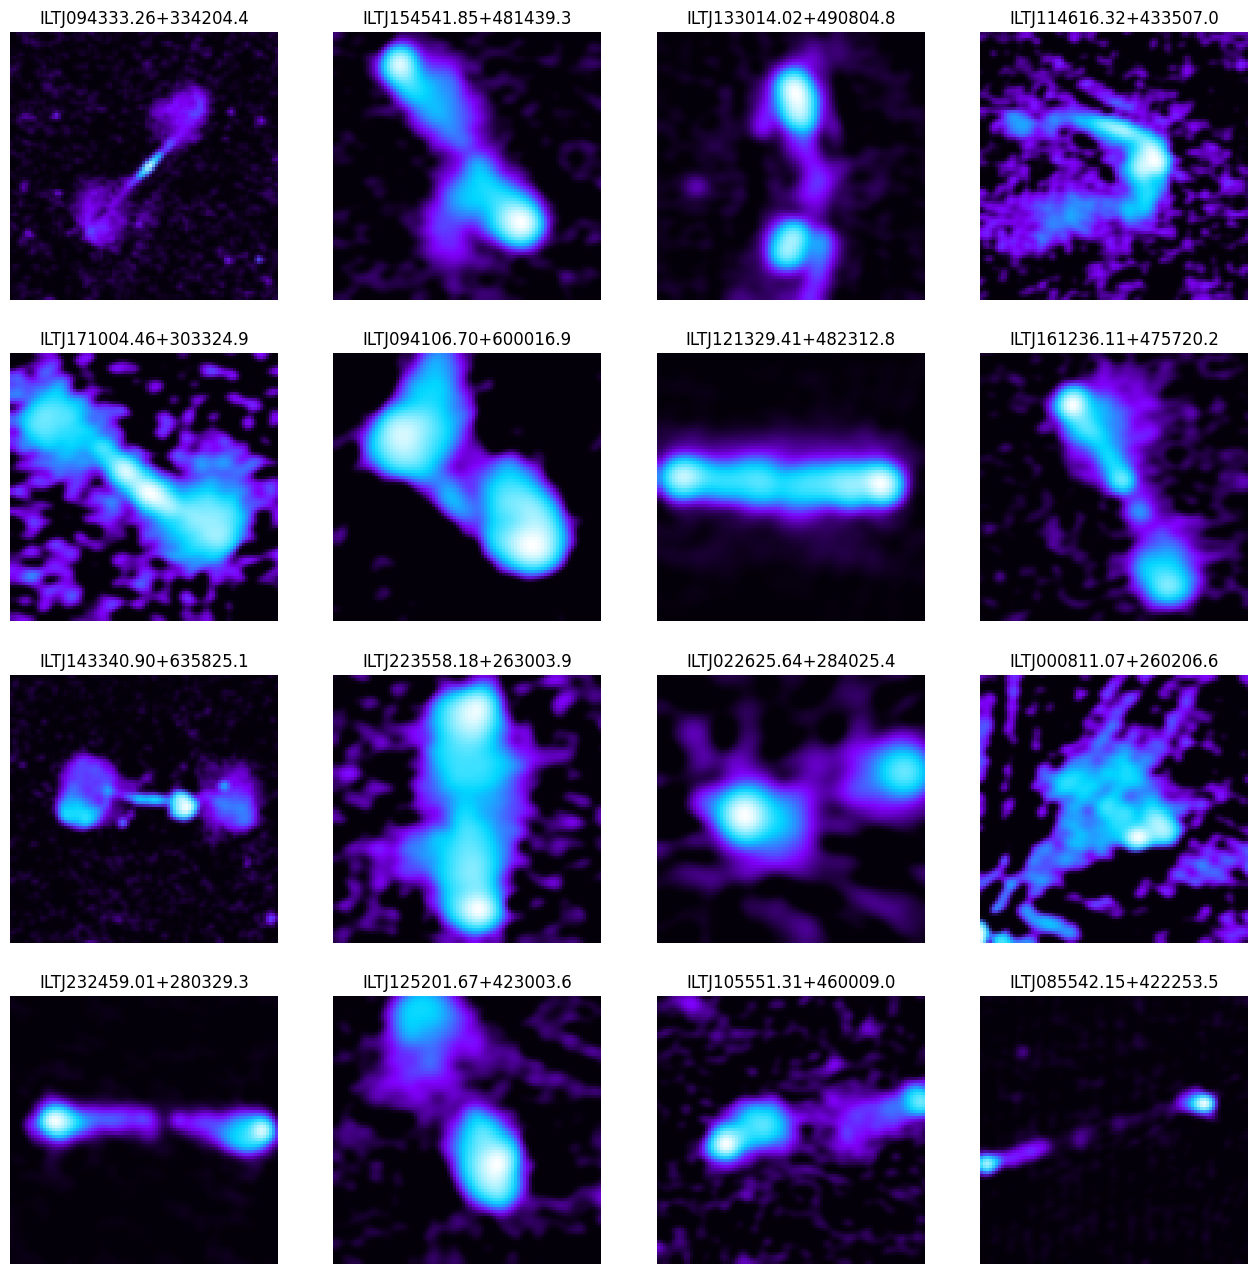

In [3]:
rd_idx = np.random.choice(n_images, size=16, replace=False)
figure(figsize=(16,16))
for i in range(16):
    subplot(4,4,1+i)
    tmp_img = Image.open(f"{imgpath}/{all_img[rd_idx[i]]}", 'r')
    title(all_img[rd_idx[i]][:-4])
    imshow(np.asarray(tmp_img))
    axis('off')
print(np.asarray(tmp_img).shape)

*Resolution changes a lot from image to image !*

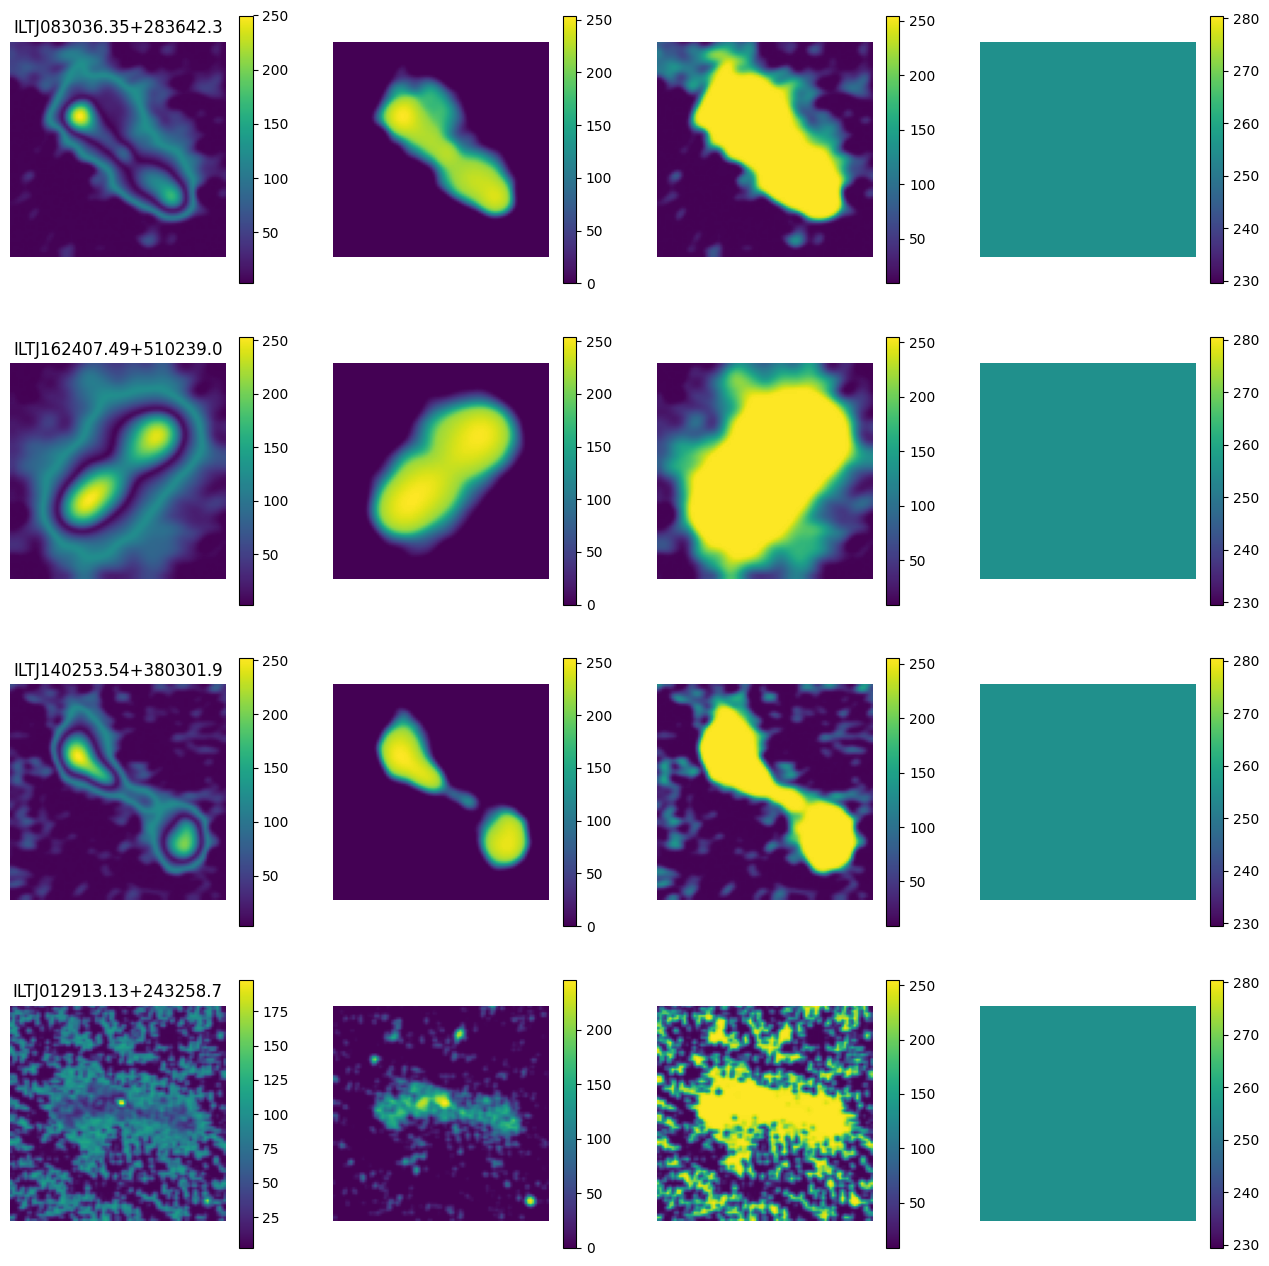

In [4]:
# Decompose the color channels

rd_idx = np.random.choice(n_images, size=16, replace=False)
figure(figsize=(16,16))
for i in range(4):
    tmp_img = Image.open(f"{imgpath}/{all_img[rd_idx[i]]}", 'r')
    for j in range(4):
        subplot(4,4,1+j+i*4)
        axis('off')
        if j==0: title(all_img[rd_idx[i]][:-4])
        imshow(np.asarray(tmp_img)[...,j])
        colorbar()

## Now checkout the labels

In [5]:
labels = pd.read_csv(f"{dataroot}{'classifications_horton_et_al_2025.csv'}")
print(labels.columns)

Index(['Source_Name', 'z_best', 'Size', 'angular_size', 'L_144', 'Mass_median',
       'flag_mass', 'fri', 'frii', 'hybrid', 'spiral', 'relaxed', 'cshaped',
       'sshaped', 'misaligned', 'wings', 'xshaped', 'straight',
       'multihotspots', 'continuous', 'banding', 'onesided', 'restarted',
       'cluster', 'merger', 'diffuse', 'unknown', 'featurecount', 'hasanyone',
       'hasanytwo', 'hasall', 'has_exactly_1', 'has_exactly_2', 'se', 'ms',
       'em'],
      dtype='object')


In [6]:
labels

,Source_Name,z_best,Size,angular_size,L_144,Mass_median,flag_mass,fri,frii,hybrid,...,unknown,featurecount,hasanyone,hasanytwo,hasall,has_exactly_1,has_exactly_2,se,ms,em
0,ILTJ000005.31+205913.2,0.432343,573.768698,101.949905,7.565640e+25,NaN,False,False,False,True,...,False,1,False,False,False,False,False,False,False,False
1,ILTJ000032.63+351901.7,0.232263,351.150841,94.866341,2.386636e+25,NaN,False,True,False,False,...,False,2,False,False,False,False,False,False,False,False
2,ILTJ000043.32+332603.9,0.252191,571.093013,145.121946,1.518521e+25,11.396078,True,True,False,False,...,False,2,False,False,False,False,False,False,False,False
3,ILTJ000104.16+273449.7,0.538799,1221.005504,192.411780,1.256614e+27,11.447244,True,False,True,False,...,False,4,True,True,True,False,False,True,True,True
4,ILTJ000107.24+340152.1,0.182558,693.800425,226.023964,2.819642e+25,11.068277,True,False,False,True,...,False,1,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,ILTJ235902.95+225420.5,0.174365,1076.992345,364.061929,2.001145e+25,11.485074,True,True,False,False,...,False,1,False,False,False,False,False,False,False,False
7609,ILTJ235937.49+300227.3,0.301459,364.228536,81.496225,1.102059e+26,10.634567,False,False,True,False,...,False,2,False,False,False,False,False,False,False,False
7610,ILTJ235942.98+292111.6,0.209755,268.865558,78.516034,1.383696e+25,NaN,False,True,False,False,...,False,2,False,False,False,False,False,False,False,False
7611,ILTJ235943.05+193223.8,0.279624,437.353126,103.148965,5.788244e+25,11.503943,True,True,False,False,...,False,3,True,False,False,True,False,False,False,False


total number of labels 8356


<BarContainer object of 5 artists>

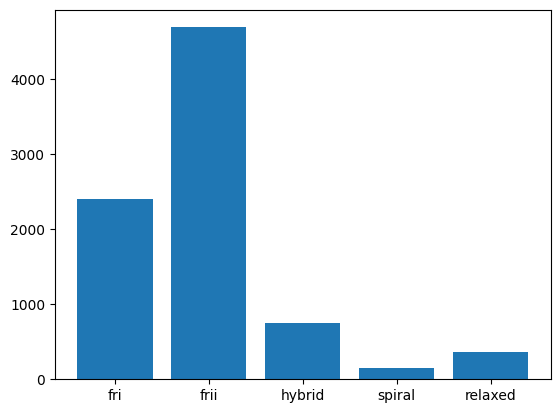

In [7]:
base_classes = ['fri', 'frii', 'hybrid', 'spiral', 'relaxed']
counts_base_classes = labels[base_classes].values.sum(axis=0)
print(f"total number of labels {np.sum(counts_base_classes)}")
bar(['fri', 'frii', 'hybrid', 'spiral', 'relaxed'], counts_base_classes, width=0.8, bottom=None,align='center')

NameError: name 'im' is not defined

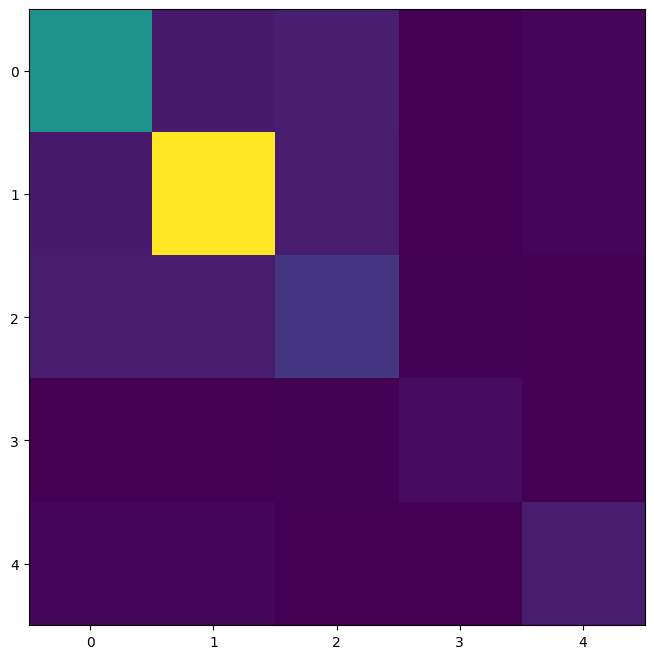

In [8]:
Y = labels[base_classes].values.astype(int)

# Co-occurrence matrix: (n_classes x n_classes)
co_matrix = Y.T @ Y

# Avoid division by zero
row_sums = co_matrix.diagonal().reshape(-1, 1)
norm_matrix = co_matrix / np.where(row_sums == 0, 1, row_sums)

plt.figure(figsize=(8, 8))
plt.imshow(co_matrix, interpolation='nearest', vmin=0, vmax=None)
plt.colorbar(im, ax=ax)

xticks(np.arange(len(base_classes)), labels=base_classes)
yticks(np.arange(len(base_classes)), labels=base_classes)

setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(base_classes)):
    for j in range(len(base_classes)):
        text(j, i, f"{co_matrix[i, j]:.2f}",
                ha="center", va="center",
                color="white" if norm_matrix[i, j] > 0.5 else "white")

title("Normalized Class Co-occurrence (P(j | i))")
xlabel("Class j")
ylabel("Class i")



**$\Rightarrow$ Multiple labels coexist for different datasets**

##  Data exploration

In [9]:
# !pip install seaborn
!python -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [10]:
import seaborn as sns
import pandas as pd

label_colums=['fri', 'frii', 'hybrid', 'spiral', 'relaxed', 'cshaped',
       'sshaped', 'misaligned', 'wings', 'xshaped', 'straight',
       'multihotspots', 'continuous', 'banding', 'onesided', 'restarted',
       'cluster', 'merger', 'diffuse', 'unknown']

### Labels co-occurence
Since galaxies can have multiple labels, we want to see which features appear together (e.g., do "cshaped" galaxies always appear in "clusters"?).

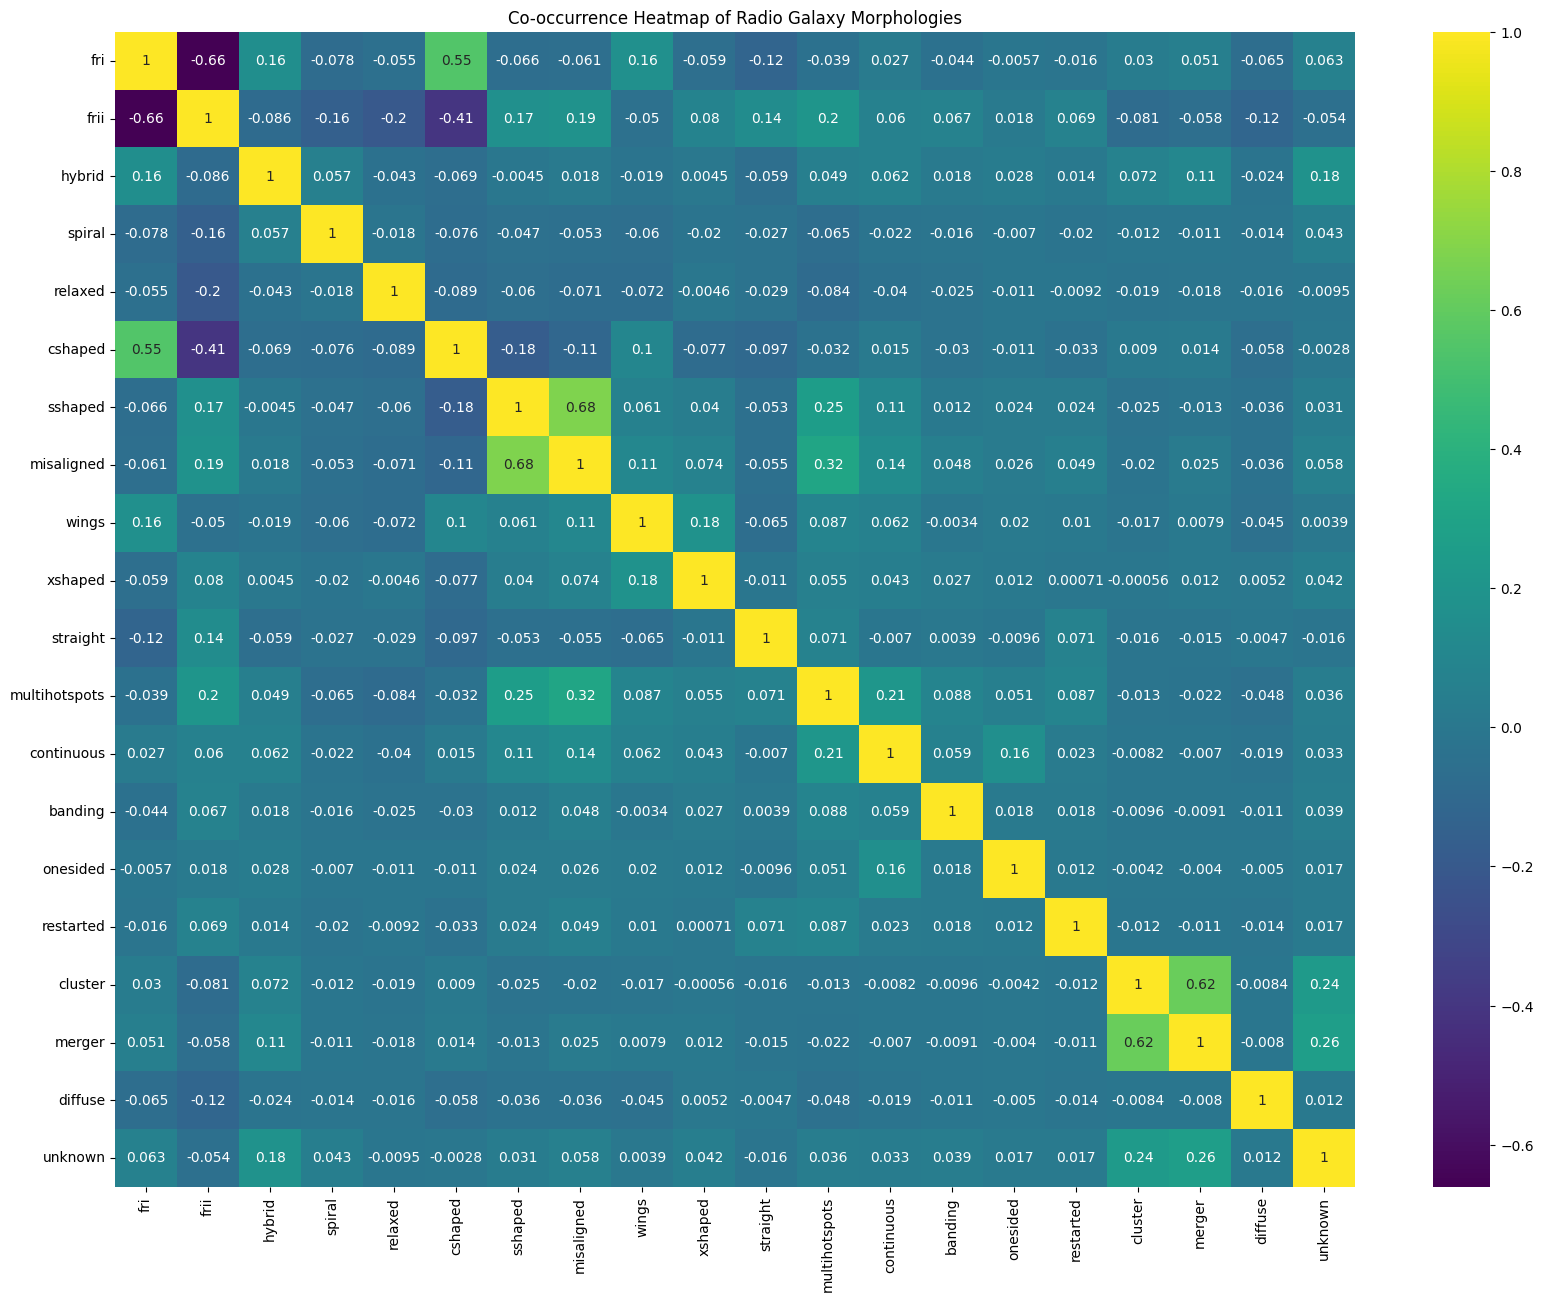

In [11]:
# Calculate the correlation matrix (Co-occurrence)
co_occurrence = labels[label_colums].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(co_occurrence, annot=True, cmap='viridis')
plt.title("Co-occurrence Heatmap of Radio Galaxy Morphologies")
plt.show()

NameError: name 'im' is not defined

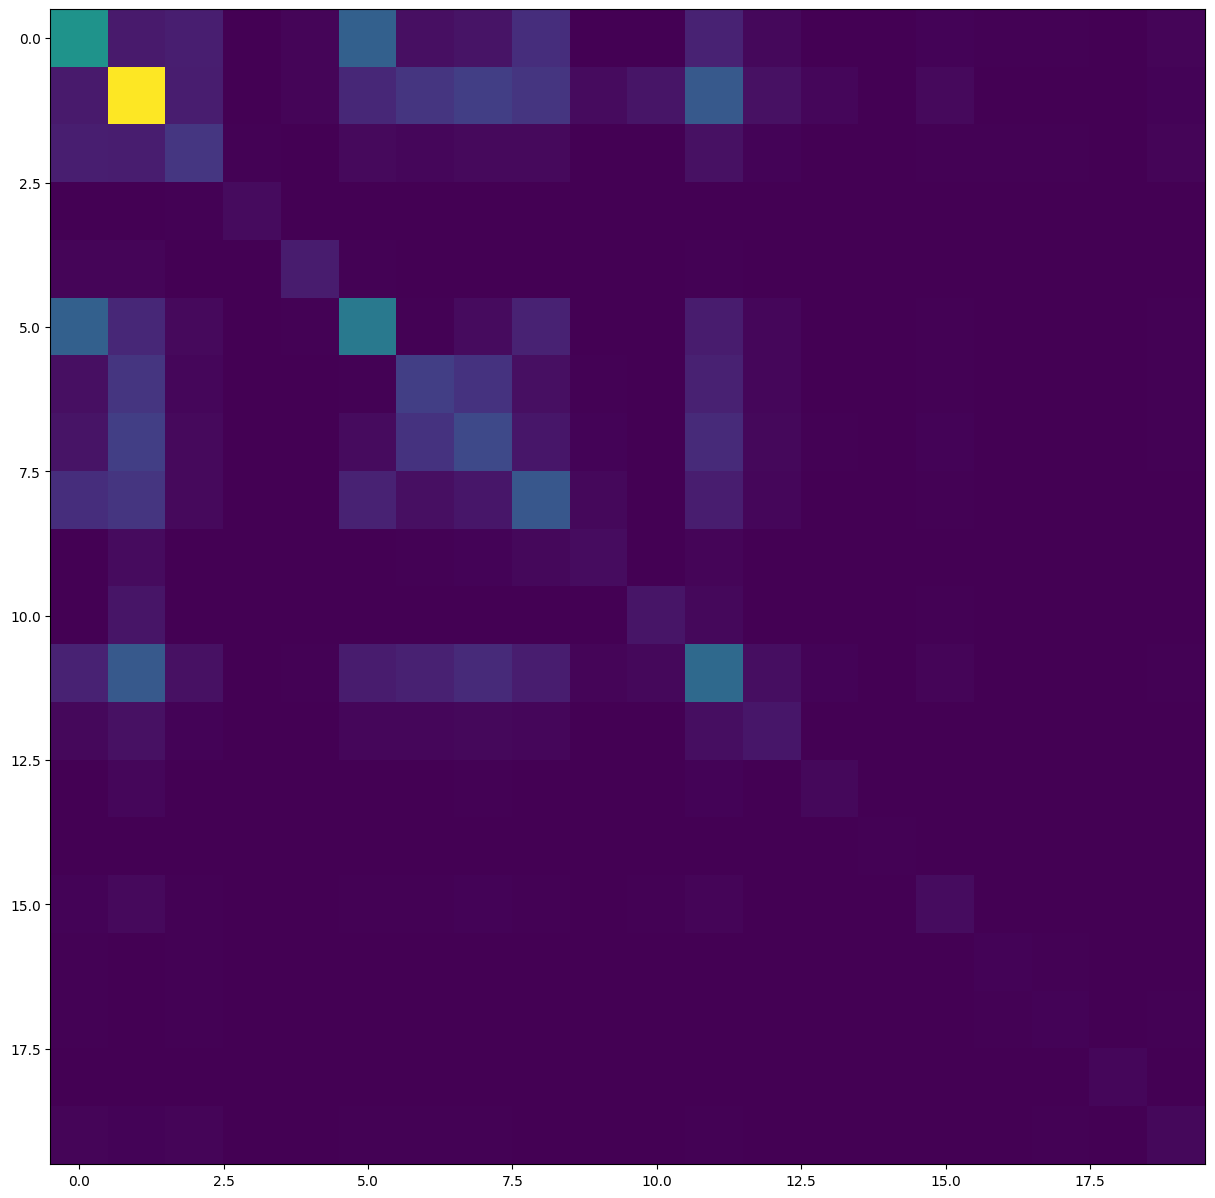

In [12]:
# counts_label_comumns=
Y = labels[label_colums].values.astype(int)

# Co-occurrence matrix: (n_classes x n_classes)
co_matrix = Y.T @ Y

# Avoid division by zero
row_sums = co_matrix.diagonal().reshape(-1, 1)
norm_matrix = co_matrix / np.where(row_sums == 0, 1, row_sums)

plt.figure(figsize=(20, 15))
plt.imshow(co_matrix, interpolation='nearest', vmin=0, vmax=None)
#im = ax.imshow(co_matrix, interpolation='nearest', vmin=0, vmax=None, cmap='viridis')
colorbar(im, ax=ax)

xticks(np.arange(len(label_colums)), labels=label_colums)
yticks(np.arange(len(label_colums)), labels=label_colums)

setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(label_colums)):
    for j in range(len(label_colums)):
        text(j, i, f"{co_matrix[i, j]:.2f}",
                ha="center", va="center",
                color="white" if norm_matrix[i, j] > 0.5 else "white")

title("Normalized Class Co-occurrence (P(j | i))")
xlabel("Class j")
ylabel("Class i")
plt.show()
plt.savefig("co-ocurence.png")



In [ ]:
plt.figure(figsize=(18,12))
counts_base_classes = labels[label_colums].values.sum(axis=0)
print(f"total number of labels {np.sum(counts_base_classes)}")
bar(['fri', 'frii', 'hybrid', 'spiral', 'relaxed', 'cshaped',
       'sshaped', 'misaligned', 'wings', 'xshaped', 'straight',
       'multihotspots', 'continuous', 'banding', 'onesided', 'restarted',
       'cluster', 'merger', 'diffuse', 'unknown'], counts_base_classes, width=0.8, bottom=None,align='center')

## Redshift distribuition

In [ ]:
## Distribuition of Redshift 
plt.figure(figsize=(18,12))
sns.histplot(labels["z_best"], bins=100, kde=True)
plt.title("Redshift Distribution (z_best)")
plt.xlabel("Redshift")
plt.show()

### Redshift vs. Classes

In [ ]:

plt.figure(figsize=(25, 10))
# Melts the dataframe to make it easier to plot categories against redshift
melted_labels = labels.melt(id_vars=['z_best'], value_vars=['fri', 'frii', 'hybrid', 'spiral', 'relaxed', 'cshaped',
       'sshaped', 'misaligned', 'wings', 'xshaped', 'straight',
       'multihotspots', 'continuous', 'banding', 'onesided', 'restarted',
       'cluster', 'merger', 'diffuse', 'unknown'], 
                            var_name='Class', value_name='Is_Present')
melted_labels = melted_labels[melted_labels['Is_Present'] == 1]

sns.boxplot(x='Class', y='z_best', data=melted_labels)
plt.title("Redshift Range per Class")
plt.show()

In [ ]:
# Index column to check for ordering bias
labels['temp_index'] = labels.index

# Check correlation between index and metadata
correlation_check = labels[['temp_index', 'z_best', 'Size', 'L_144']].corr()
print("Correlation with Image Index (Should be near 0):")
print(correlation_check['temp_index'])

# Visualization: Index vs Redshift
plt.figure(figsize=(10, 4))
plt.scatter(labels['temp_index'], labels['z_best'], s=1, alpha=0.3)
plt.xlabel("Image Index")
plt.ylabel("Redshift")
plt.title("Index vs Redshift (Check for ordering bias)")
plt.show()

### Data pre-processing

In [ ]:
# Create a set of source names that have images
# This removes the '.png' from filenames like 'ILTJ002221.05+323539.5.png'
image_source_names = {img.replace('.png', '') for img in all_img}
# 'print(image_source_names)
image_source_names = sorted(image_source_names)

In [28]:
# Generating an array of labels

# 1. Align the CSV with the images
image_names_clean = {img.replace('.png', '') for img in all_img}
labels_cleaned = labels[labels['Source_Name'].isin(image_names_clean)].sort_values('Source_Name').reset_index(drop=True)

# 2. Identify the morphological label columns
# Based on your column list: 'fri', 'frii', 'hybrid', 'spiral', etc.
label_colums = ['fri', 'frii', 'hybrid', 'spiral', 'relaxed', 'cshaped',
       'sshaped', 'misaligned', 'wings', 'xshaped', 'straight',
       'multihotspots', 'continuous', 'banding', 'onesided', 'restarted',
       'cluster', 'merger', 'diffuse', 'unknown']

# 3. Create the labels array (n_images, n_labels)
Y = labels_cleaned[label_colums].values.astype(float)
print(f"Labels array shape: {Y.shape}")

Labels array shape: (7607, 20)


In [35]:
# Save labels (7607, 20)
np.save(f"{dataroot}labels.npy", Y)
print(f"Y: {Y.shape}")

Y: (7607, 20)


In [36]:
from PIL import Image
from tqdm import tqdm


def prepare_final_arrays(df, img_dir, n_pix=89):
    n_samples = len(df)
    # Initialize the array
    X = np.zeros((n_samples, n_pix, n_pix), dtype=np.uint8)
    
    print(f"Processing {n_samples} images to {n_pix}x{n_pix} grayscale...")
    
    for i, name in enumerate(tqdm(df['Source_Name'])):
        path = os.path.join(img_dir, f"{name}.png")
        
        try:
            # 1. Open and convert to Gray
            img = Image.open(path).convert('L')
            
            # 2. Resize with a high-quality filter (LANCZOS)
            # This is better for scientific data than the default
            img = img.resize((n_pix, n_pix), Image.Resampling.LANCZOS)
            
            # 3. Store in array
            X[i] = np.array(img)
            
        except FileNotFoundError:
            print(f"Warning: {name}.png not found at {path}")
            continue
            
    return X

# Run the processing
X = prepare_final_arrays(labels_cleaned, imgpath, n_pix=89)

# (Optional) If your model expects (Samples, H, W, 1)
# X = np.expand_dims(X, axis=-1)

Processing 7607 images to 89x89 grayscale...


100%|██████████| 7607/7607 [00:05<00:00, 1294.87it/s]


In [37]:
# Save images (7607, 89, 89)
np.save(f"{dataroot}images_89.npy", X)

print("--- Final Array Shapes ---")
print(f"X: {X.shape}")

--- Final Array Shapes ---
X: (7607, 89, 89)


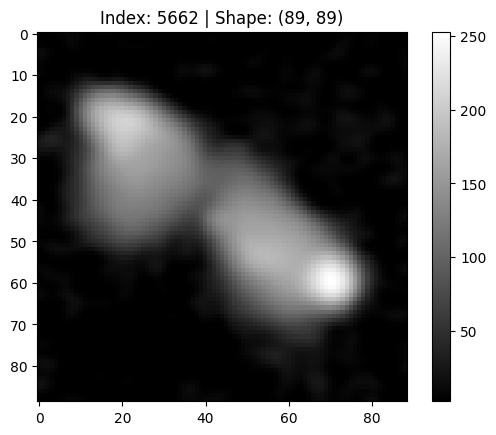

In [39]:
import matplotlib.pyplot as plt

# Pick a random galaxy to verify the resize and grayscale
idx = np.random.randint(0, len(X))
plt.imshow(X[idx], cmap='gray')
plt.title(f"Index: {idx} | Shape: {X[idx].shape}")
plt.colorbar()
plt.show()